<a href="https://colab.research.google.com/github/Razeeeeeeeeeee/machine-learning/blob/main/basic%20NN%20digit%20classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Digit classifier
here we're going to code a simple learning network that classifies images as numbers


In [ ]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [62]:
data = pd.read_csv('train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
data = np.array(data)
m, n= data.shape
np.random.shuffle(data)

data_1=data[0:1000].T
y1=data_1[0]
x1=data_1[1:n]
x1=x1/255

data_2=data[1000:m].T
y2=data_2[0]
x2=data_2[1:n]
x2=x2/255



In [97]:
def init():
  w1=np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
  b1=np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
  w2=np.random.normal(size=(10, 10)) * np.sqrt(1./(784))
  b2=np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
  return w1,b1,w2,b2

In [ ]:
def RELU(z):
  return np.maximum(z,0)

In [71]:
def softmax(z):
  return np.exp(z)/sum(np.exp(z))

In [78]:
def forward(w1,b1,w2,b2,x):
    z1=w1.dot(x)+b1
    a1=RELU(z1)
    z2=w2.dot(a1)+b2
    a2=softmax(z2)
    return z1,a1,z2,a2

In [82]:
def onehot(y):
  oney=np.zeros((y.size,y.max()+1))
  oney[np.arange(y.size),y]=1
  return oney.T

In [84]:
def backward(z1,a1,z2,a2,w1,w2,x,y):
    m=y.size
    oney=onehot(y)
    dz2=a2-oney
    dw2=1/m * dz2.dot(a1.T)
    db2=1/m * np.sum(dz2)
    dz1=w2.T.dot(dz2)* der(z1)
    dw1=1/m * dz1.dot(x.T)
    db1=1/m * np.sum(dz1)
    return dw1,db1,dw2,db2

In [75]:
def der(z):
  return z>0

In [76]:
def update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [86]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [100]:
w1, b1, w2, b2 = gradient_descent(x1, y1, 0.2, 500)

Iteration:  0
0.08
Iteration:  10
0.209
Iteration:  20
0.379
Iteration:  30
0.454
Iteration:  40
0.534
Iteration:  50
0.671
Iteration:  60
0.744
Iteration:  70
0.783
Iteration:  80
0.816
Iteration:  90
0.84
Iteration:  100
0.854
Iteration:  110
0.868
Iteration:  120
0.881
Iteration:  130
0.889
Iteration:  140
0.897
Iteration:  150
0.907
Iteration:  160
0.91
Iteration:  170
0.916
Iteration:  180
0.919
Iteration:  190
0.92
Iteration:  200
0.922
Iteration:  210
0.926
Iteration:  220
0.929
Iteration:  230
0.931
Iteration:  240
0.938
Iteration:  250
0.944
Iteration:  260
0.945
Iteration:  270
0.952
Iteration:  280
0.953
Iteration:  290
0.954
Iteration:  300
0.957
Iteration:  310
0.961
Iteration:  320
0.963
Iteration:  330
0.967
Iteration:  340
0.967
Iteration:  350
0.97
Iteration:  360
0.972
Iteration:  370
0.973
Iteration:  380
0.976
Iteration:  390
0.977
Iteration:  400
0.978
Iteration:  410
0.978
Iteration:  420
0.978
Iteration:  430
0.979
Iteration:  440
0.98
Iteration:  450
0.982
Itera

In [101]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x1[:, index, None]
    prediction = make_predictions(x1[:, index, None], W1, b1, W2, b2)
    label = y1[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


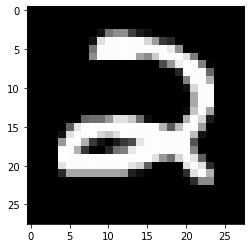

Prediction:  [1]
Label:  1


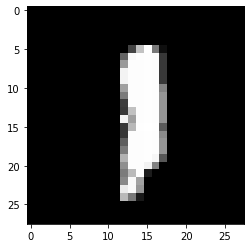

Prediction:  [3]
Label:  3


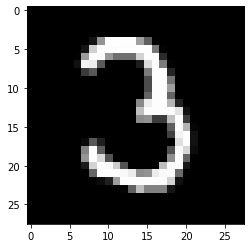

Prediction:  [5]
Label:  5


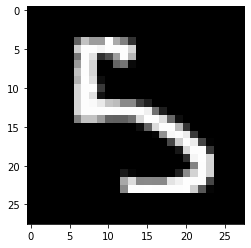

In [102]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)
